In [3]:
import numpy as np
from scipy.signal import correlate
import mne
from mne.preprocessing import (ICA, create_ecg_epochs, create_eog_epochs, corrmap)
import matplotlib.pyplot as plt
from GradientRemover import GradientRemover

In [5]:
import numpy as np
from scipy.signal import correlate
import mne
from mne.preprocessing import (ICA, create_ecg_epochs, create_eog_epochs, corrmap)
import matplotlib.pyplot as plt
from GradientRemover import GradientRemover
raw = mne.io.read_raw_brainvision('/Users/samuel/codes/eeg_fmri/source/sub-01/ses-01/eeg/sub-01_ses-01_task-rest_run-01_eeg.vhdr',
                                  preload=True)
raw.filter(1, None)
ev = mne.events_from_annotations(raw, event_id = {'Stimulus/R128' : 0})
#g_remover = GradientRemover(raw.get_data(),ev[0])
#raw_corrected = g_remover.correct()
#channels_mapping = {
#    'ECG': 'ecg',
#    'EOGU': 'eog',
#    'EOGL': 'eog',
#}
#raw = mne.io.RawArray(raw_corrected, raw.info)
#raw.set_channel_types(channels_mapping)
#raw.set_montage('standard_1005', on_missing='ignore')
##raw.filter(None, 50).resample(250)
raw.plot()


Extracting parameters from /Users/samuel/codes/eeg_fmri/source/sub-01/ses-01/eeg/sub-01_ses-01_task-rest_run-01_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 3111999  =      0.000 ...   622.400 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 16501 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Used Annotations descriptions: ['Stimulus/R128']
Using pyopengl with version 3.1.6


Channels marked as bad:
none


In [13]:
epochs = mne.Epochs(raw, 
                    ev[0][50:-50,:], 
                    tmin=-0.04, tmax=0.04, baseline=None, preload=True)

Not setting metadata
188 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 188 events and 401 original time points ...
0 bad epochs dropped


In [74]:
1/peak_frequency

0.05526549458355532

In [71]:
%matplotlib qt
plt.plot(frequencies,np.abs(fft))
plt.axvline(frequencies[peaks[0]], color='r')

In [61]:
frequencies[peaks[0]]

17.61889460154242

In [3]:
o = [ons/raw.info['sfreq'] for ons in onset] 
annot = mne.Annotations(o, duration = np.zeros(len(o)), description = 'G', orig_time = raw.info['meas_date'])
raw.set_annotations(annot)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,5000.00 Hz
Highpass,1.00 Hz
Lowpass,2500.00 Hz


In [4]:
raw.plot(duration = 0.5, start=350, scalings='auto')

Using qt as 2D backend.
Using pyopengl with version 3.1.6


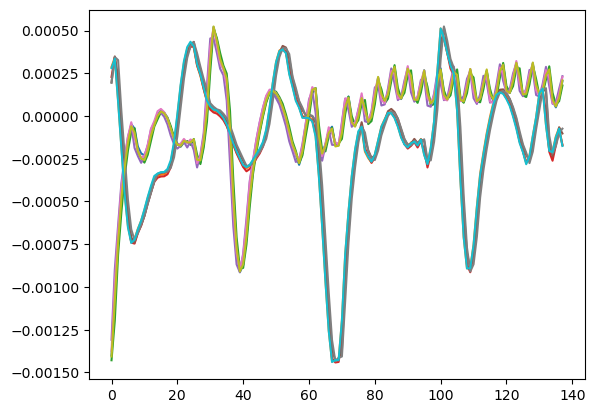

In [25]:
import matplotlib.pyplot as plt
n_pack = 10
packet = [data[:,onset[j] - round(period_samples/2):onset[j] + round(period_samples/2)] for j in range(n_pack)]
packet = np.array(packet)

plt.plot(np.mean(packet,axis=1).T)

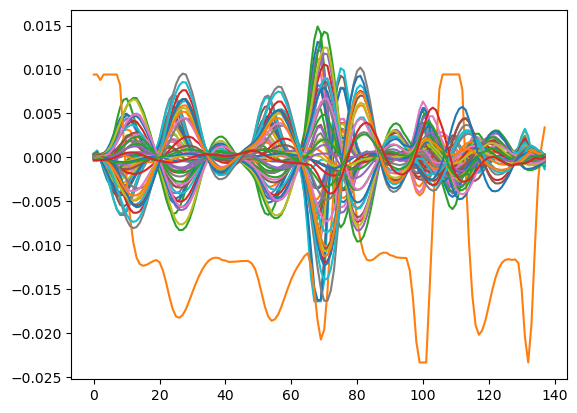

In [29]:
plt.plot(packet[3,:,:].T)

In [32]:
np.diff(gradient_trigger[0][:,0])

array([10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500,

In [23]:
d.shape

(64, 1001)

In [20]:
rows = ["{},{}".format(i, j) for i, j in d] 
text = "\n".join(rows) 
  
with open('data.csv', 'w') as f: 
    f.write(text)

ValueError: too many values to unpack (expected 2)

In [52]:
m = frequencies[peaks[0][0]]
round(((1/m))*raw.info['sfreq'])

138

In [146]:
str(type(d))

"<class 'mne.io.brainvision.brainvision.RawBrainVision'>"

In [147]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import mne
import numpy as np

raw = mne.io.read_raw_brainvision("/Users/samuel/codes/eeg_fmri/source/sub-01/ses-01/eeg/sub-01_ses-01_task-rest_run-01_eeg.vhdr", preload=True)
d = raw.copy().crop(0,13)
#data = pd.read_csv('data.csv')
def detect_gradient_artifacts(data, height=None, sampling_rate = None):
    """
    Detects gradient artifacts in EEG data by combining all channels.

    :param data: A 2D array where each row represents a channel and each column represents a time sample.
    :param combine_method: Method to combine channels ('sum' or 'average').
    :param height: The minimum height of peaks to be considered as artifacts. If None, it will be determined automatically.
    :return: Indices of the detected artifact peaks.
    """
    high_pass = 6
    if isinstance(data, np.ndarray):
        _data = data
        if not sampling_rate:
            raise ValueError(
                "If not an mne.io.Raw object provided please specify the sampling rate"
            )
    else:
        _data = data.copy().filter(high_pass, None).get_data()
        sampling_rate = data.info['sfreq']
    
    signal = np.sum(abs(_data), axis=0)

    b, a = scipy.signal.butter(6, high_pass / (0.5 * sampling_rate), btype='high')
    filtered_data = scipy.signal.filtfilt(b, a, signal)
    fft = np.fft.fft(filtered_data)
    fft = np.abs(fft[:filtered_data.shape[0]//2])
    frequencies = np.fft.fftfreq(filtered_data.shape[0], 1/raw.info['sfreq'])
    frequencies = frequencies[:filtered_data.shape[0]//2]
    peak_sample = np.argmax(np.abs(fft))
    peak_frequency = frequencies[peak_sample]
    sample_period = round((1/peak_frequency) * raw.info['sfreq'])
    
    # Automatically determine height if not provided
    if height is None:
        height = np.mean(signal) + 2 * np.std(signal)

    # Detect peaks in the combined data
    peaks, _ = scipy.signal.find_peaks(signal, height=height, distance=sample_period - 1)

    return peaks, sample_period

# Detect artifacts in the EEG data
detected_artifacts, length = detect_gradient_artifacts(d)

# Plot the combined signal with detected artifacts for visualization
combined_eeg_signal = np.sum(np.abs(d.get_data()), axis=0)
plt.figure(figsize=(15, 4))
plt.plot(combined_eeg_signal, label='Combined EEG Signal')
plt.scatter(detected_artifacts, combined_eeg_signal[detected_artifacts], color='red', label='Detected Artifacts')
plt.title("Combined EEG Signal with Detected Gradient Artifacts")
plt.xlabel("Time Samples")
plt.ylabel("Amplitude (Volts)")
plt.legend()
plt.show()

Extracting parameters from /Users/samuel/codes/eeg_fmri/source/sub-01/ses-01/eeg/sub-01_ses-01_task-rest_run-01_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 3111999  =      0.000 ...   622.400 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 6.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 8251 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [29]:
raw.plot()

Using qt as 2D backend.
Using pyopengl with version 3.1.6


Channels marked as bad:
none


In [51]:
%matplotlib qt
def creating_template(data, artifact_number,artifact_indices, artifact_length, artifact_nb):
    # Initialize the artifact template

    if artifact_number < artifact_nb[0]:
        left = artifact_number
        right = abs(artifact_number - artifact_nb[0]) + artifact_nb[0]

    elif artifact_number + artifact_nb[1] > len(artifact_indices):
        left = artifact_nb[0] + (artifact_nb[1] - (len(artifact_indices) - artifact_number))
        right = len(artifact_indices) - artifact_number

    else:
        left = artifact_nb[0]
        right = artifact_nb[1]

    if left == 0:
        artifacts_left = None
    else:
        print(left)
        artifacts_left = np.zeros((left, data.shape[0], artifact_length))
        print(artifacts_left.shape)
        for j in range(left):
            print(j)
            start = artifact_indices[artifact_number-j] - artifact_length //2
            end = artifact_indices[artifact_number-j] + artifact_length //2
            artifacts_left[j,:,:] = data[:,start:end]

    if right == 0:
        artifacts_right = None
    else:
        artifacts_right = np.zeros((right, data.shape[0], artifact_length))
        for i in range(right):
            start = artifact_indices[artifact_number+i] - artifact_length //2
            end = artifact_indices[artifact_number+i] + artifact_length //2
            if start<0: continue
            artifacts_right[i,:,:] = data[:,start:end]
    

    if artifact_number == 0 or artifact_nb[0] == 0:
        artifact_epochs = artifacts_right

    elif artifact_number == len(artifact_indices):
        artifact_epochs = artifacts_left
    
    else:
        artifact_epochs = np.concatenate([artifacts_left,artifacts_right], axis = 0)
    
    template = np.mean(artifact_epochs,axis = 0)

    return template
            

def remove_gradient_artifacts(data, artifact_indices, artifact_length, artifact_nb):
    """
    Removes gradient artifacts from EEG data.

    :param data: A 2D array where each row represents a channel and each column represents a time sample.
    :param artifact_indices: Indices of detected artifacts.
    :param artifact_length: The length of each artifact in samples.
    :param artifact_nb: tuple nb of artifact to take before and after 
    :return: EEG data with gradient artifacts removed.
    """

    # Subtract the artifact template from each occurrence
    corrected_data = np.copy(data)
    for artifact_number in range(len(artifact_indices)):
        start = artifact_indices[artifact_number] - artifact_length // 2
        end = artifact_indices[artifact_number] + artifact_length // 2
        if start < 0:
            continue
        template = creating_template(data,artifact_number, artifact_indices, artifact_length, (3,3))
        corrected_data[:, start:end] -= template

    return corrected_data

# Apply artifact removal
corrected_eeg_data = remove_gradient_artifacts(d, detected_artifacts, length, (3,3))

# Plot the corrected EEG data for a single channel for visualization
plt.figure(figsize=(15, 4))
plt.plot(d[0], label='Original EEG Signal')
plt.plot(corrected_eeg_data[0], label='Corrected EEG Signal')
plt.title("EEG Signal Before and After Artifact Removal")
plt.xlabel("Time Samples")
plt.ylabel("Amplitude (Volts)")
plt.legend()
plt.show()


1
(1, 64, 276)
0
2
(2, 64, 276)
0
1
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1
2
3
(3, 64, 276)
0
1


ValueError: could not broadcast input array from shape (64,262) into shape (64,276)

In [130]:

from GradientRemover import GradientRemover
events = mne.events_from_annotations(raw, {'Stimulus/R128': 1})
remover = GradientRemover(raw.get_data(),events[0], (0,4))
raw_cleaned = remover.correct()
cleaned = mne.io.RawArray(raw_cleaned, info = raw.info)


plt.figure(figsize=(15, 4))
plt.plot(raw.copy().crop(0,13).get_data()[0,:], label='Original EEG Signal')
plt.plot(cleaned.copy().crop(0,13).get_data()[0,:], label='Corrected EEG Signal')
plt.title("EEG Signal Before and After Artifact Removal")
plt.xlabel("Time Samples")
plt.ylabel("Amplitude (Volts)")
plt.legend()
plt.show()

Used Annotations descriptions: ['Stimulus/R128']
Creating RawArray with float64 data, n_channels=64, n_times=3112000
    Range : 0 ... 3111999 =      0.000 ...   622.400 secs
Ready.


In [134]:
c = cleaned.copy().crop(0,13)
detected_artifacts, length = detect_gradient_artifacts(c)
plt.figure(figsize=(15, 4))
plt.plot(c.get_data()[0,:].T, label='Combined EEG Signal')
plt.scatter(detected_artifacts, c.get_data()[0,detected_artifacts], color='red', label='Detected Artifacts')
plt.title("Combined EEG Signal with Detected Gradient Artifacts")
plt.xlabel("Time Samples")
plt.ylabel("Amplitude (Volts)")
plt.legend()
plt.show()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 8251 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [152]:
plt.figure(figsize=(15, 4))
plt.plot(c.get_data()[0,:].T, label='Combined EEG Signal')
template = remover.get_tr_template(4)
time_template = np.linspace(detected_artifacts[0],detected_artifacts[0] + len(template[0,:]), len(template[0,:]))
plt.plot(time_template,template[0,:])
plt.scatter(detected_artifacts, c.get_data()[0,detected_artifacts], color='red', label='Detected Artifacts')
plt.title("Combined EEG Signal with Detected Gradient Artifacts")
plt.xlabel("Time Samples")
plt.ylabel("Amplitude (Volts)")
plt.legend()
plt.show()

In [157]:
t = [template]*2

[array([[ 0.01013153,  0.01257678,  0.01320228, ...,  0.00137589,
          0.00337264,  0.00690364],
        [ 0.00833909,  0.01053184,  0.01140259, ...,  0.00076217,
          0.00225292,  0.00502217],
        [ 0.01174124,  0.01454424,  0.014878  , ...,  0.00186166,
          0.00423067,  0.00852542],
        ...,
        [-0.00567917, -0.00774443, -0.00963693, ..., -0.00103987,
         -0.00226212, -0.00386112],
        [-0.0018172 , -0.00237319, -0.00290469, ..., -0.00070924,
         -0.00101823, -0.00136873],
        [-0.00105131, -0.00146857, -0.00229208, ..., -0.00068348,
         -0.00071148, -0.00076299]]),
 array([[ 0.01013153,  0.01257678,  0.01320228, ...,  0.00137589,
          0.00337264,  0.00690364],
        [ 0.00833909,  0.01053184,  0.01140259, ...,  0.00076217,
          0.00225292,  0.00502217],
        [ 0.01174124,  0.01454424,  0.014878  , ...,  0.00186166,
          0.00423067,  0.00852542],
        ...,
        [-0.00567917, -0.00774443, -0.00963693, ..., -

In [153]:
plt.plot(template[0,:])

In [156]:
residual,_ = detect_gradient_artifacts(c, sampling_rate = c.info['sfreq'])
template_peaks,_ = detect_gradient_artifacts(template, sampling_rate = c.info['sfreq'])
ratio = len(residual) - len(template_peaks)
if ratio > 1:
    new_template = np.concatenate([template]*ratio,axis=1)
elif 0 < ratio < 1:
    
    new_template = 

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 6.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 8251 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


76

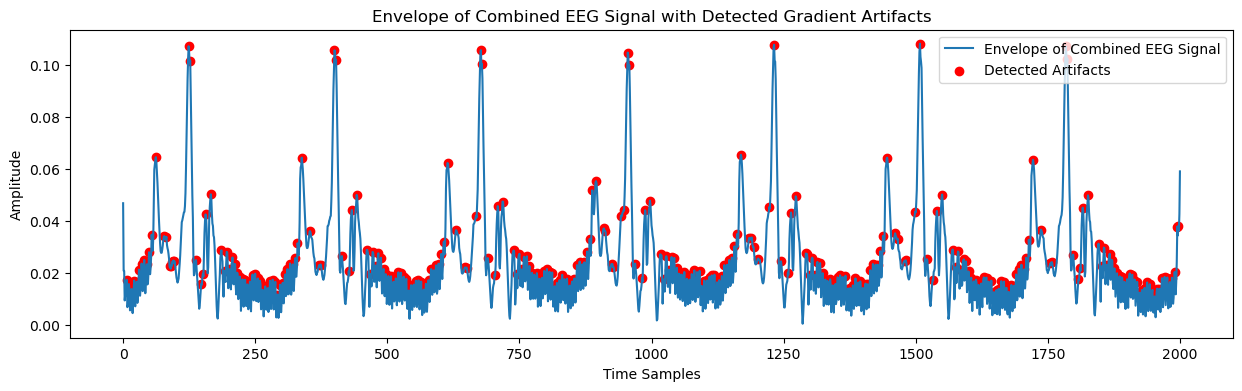

In [43]:
import numpy as np
import scipy.signal

def detect_artifacts_using_hilbert(data, combine_method='sum'):
    """
    Detects gradient artifacts in EEG data by combining all channels and using Hilbert transform to find the envelope.

    :param data: A 2D array where each row represents a channel and each column represents a time sample.
    :param combine_method: Method to combine channels ('sum' or 'average').
    :return: Indices of the detected artifact peaks in the envelope.
    """

    # Combine all channels
    if combine_method == 'sum':
        combined_data = np.sum(data, axis=0)
    elif combine_method == 'average':
        combined_data = np.mean(data, axis=0)
    else:
        raise ValueError("Invalid combine_method. Choose 'sum' or 'average'.")

    # Apply Hilbert transform to get the envelope
    analytical_signal = scipy.signal.hilbert(combined_data)
    envelope = np.abs(analytical_signal)

    # Detect peaks in the envelope
    peaks, _ = scipy.signal.find_peaks(envelope)

    return peaks, envelope

# Detect artifacts using Hilbert transform
detected_artifacts_hilbert, envelope = detect_artifacts_using_hilbert(data.iloc[1:, 1:].values)

# Plot the envelope with detected artifacts for visualization
plt.figure(figsize=(15, 4))
plt.plot(envelope, label='Envelope of Combined EEG Signal')
plt.scatter(detected_artifacts_hilbert, envelope[detected_artifacts_hilbert], color='red', label='Detected Artifacts')
plt.title("Envelope of Combined EEG Signal with Detected Gradient Artifacts")
plt.xlabel("Time Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [39]:
detect_gradient_artifacts(d, combine_method='sum', height=None)

NameError: name 'detect_gradient_artifacts' is not defined

In [36]:
import pandas as pd
df = pd.DataFrame(d)

In [37]:
df.to_csv('data.csv')

In [ ]:

with open('data.txt', 'w') as f:
    for item in d:
        f.write("%s\n" % item)

In [136]:
plt.plot(filtered_data[0, :])

In [131]:
fft.shape

(1, 1555801)

In [25]:
%matplotlib qt
import matplotlib.pyplot as plt
nfft = np.arange(0,fft.shape[1])*raw.info['sfreq']/fft.shape[1]
plt.plot(nfft, fft[0, :])

/Users/samuel/anaconda3/envs/mne/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/samuel/anaconda3/envs/mne/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [129]:
m = np.argmax(fft[0, :])*raw.info['sfreq']/fft.shape[1]

69

In [34]:
gradient_trigger[0][0][0]

39455

In [125]:
k = 2


In [99]:
round((1/(m/2))*raw.info['sfreq'])

276

In [25]:
raw.info['sfreq'] / fft.shape[1]

0.0032137786259296658

In [ ]:
from GradientRemover import GradientRemover
g_remover = GradientRemover(raw.get_data(), gradient_trigger[0], (2,2))
raw_corrected = g_remover.correct()
raw = mne.io.RawArray(raw_corrected, raw.info)
raw.filter(None, 50).resample(250)
raw.plot()

Using qt as 2D backend.
Using pyopengl with version 3.1.6


Channels marked as bad:
none
